## Assignment: $k$ Means Clustering

## **Do two questions.**

`! git clone https://www.github.com/DS3001/kmc`

**Q1.** This question is a case study for $k$ means clustering.

1. Load the `airbnb_hw.csv` data. Clean `Price` along with `Beds`, `Number of Reviews`, and `Review Scores Rating`.
2. Maxmin normalize the data and remove any `nan`'s (`KMeans` from `sklearn` doesn't accept `nan` input).
3. Use `sklearn`'s `KMeans` module to cluster the data by `Beds`, `Number of Reviews`, and `Review Scores Rating` for `k=6`.
4. Use `seaborn`'s `.pairplot()` to make a grid of scatterplots that show how the clustering is carried out in multiple dimensions.
5. Use `.groupby` and `.describe` to compute the average price for each cluster. Which clusters have the highest rental prices?
6. Use a scree plot to pick the number of clusters and repeat steps 4 and 5.

1. Load the airbnb_hw.csv data. Clean Price along with Beds, Number of Reviews, and Review Scores Rating.

In [44]:
import pandas as pd
import numpy as np
import seaborn as sns

df = pd.read_csv("./data/airbnb_hw.csv")
df.shape # 30478 rows and 13 columns
print(df.describe()) # 'Review Scores Rating' and 'Beds' have missing values

df['Price'].unique() # need to convert Price into ints
df['Price'] = df['Price'].str.replace(',', '')
df['Price'] = pd.to_numeric(df['Price'], errors = 'coerce')
df['Price'].unique()

df['Beds'].unique()
df['Beds'] = df['Beds'].fillna(1) # Assume that null value properites have 1 bed
df['Beds'].unique()

cleaned = df[['Price', 'Beds', 'Number Of Reviews', 'Review Scores Rating']].copy()
cleaned.describe() # only 'Review Scores Rating' has null values
cleaned = cleaned.dropna() # drop rows with null values for 'Review Scores Rating'
cleaned.describe() # All null values have been taken care of

            Host Id  Review Scores Rating (bin)       Zipcode          Beds  \
count  3.047800e+04                22155.000000  30344.000000  30393.000000   
mean   1.273171e+07                   90.738659  10584.854831      1.530089   
std    1.190270e+07                    9.059519    921.299397      1.015359   
min    5.000000e+02                   20.000000   1003.000000      0.000000   
25%    2.701298e+06                   85.000000  10017.000000      1.000000   
50%    8.551693e+06                   90.000000  10065.000000      1.000000   
75%    2.120617e+07                  100.000000  11216.000000      2.000000   
max    4.303307e+07                  100.000000  99135.000000     16.000000   

       Number of Records  Number Of Reviews  Review Scores Rating  
count            30478.0       30478.000000          22155.000000  
mean                 1.0          12.018735             91.993230  
std                  0.0          21.980703              8.850373  
min             

,Price,Beds,Number Of Reviews,Review Scores Rating
count,22155.000000,22155.000000,22155.000000,22155.000000
mean,154.787633,1.556985,16.505439,91.993230
std,148.836621,1.043273,24.308241,8.850373
min,10.000000,0.000000,1.000000,20.000000
25%,85.000000,1.000000,2.000000,89.000000
50%,125.000000,1.000000,7.000000,94.000000
75%,190.000000,2.000000,20.000000,100.000000
max,10000.000000,16.000000,257.000000,100.000000


2. Maxmin normalize the data and remove any nan's (KMeans from sklearn doesn't accept nan input).

In [45]:
# All of the nan's were taken care of in part 1

def maxmin(z):
    z = (z-min(z))/(max(z)-min(z))
    return(z)


X = cleaned.apply(maxmin)

3. Use sklearn's KMeans module to cluster the data by Beds, Number of Reviews, and Review Scores Rating for k=6.

In [46]:
from sklearn.cluster import KMeans

X = X.drop('Price', axis=1)

model = KMeans(n_clusters=6, max_iter=300, n_init=10, random_state=100) # default value for max_iter is 300, for n_init is 10
model = model.fit(X)
X['cluster'] = model.labels_



4. Use seaborn's .pairplot() to make a grid of scatterplots that show how the clustering is carried out in multiple dimensions.

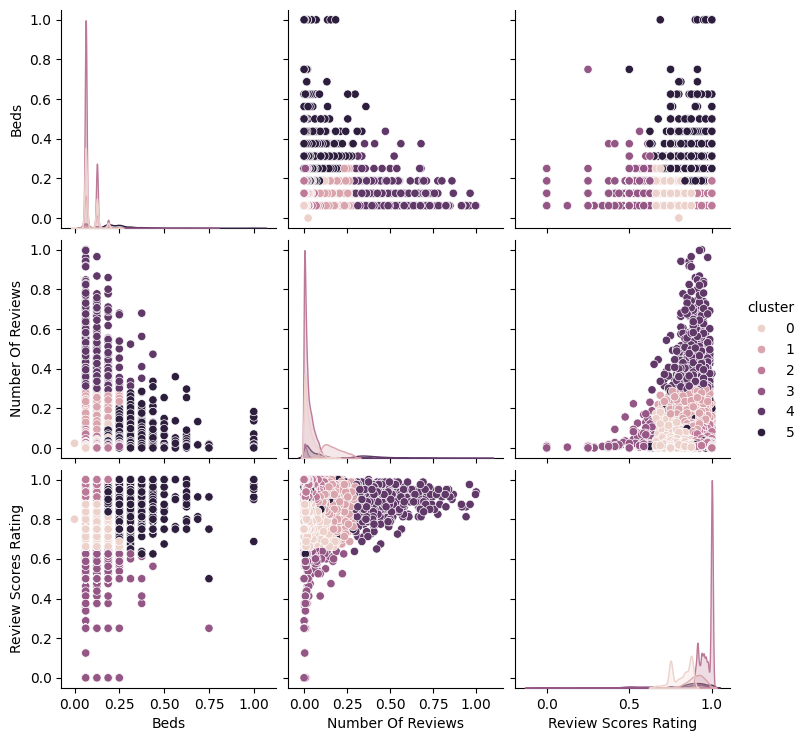

In [47]:
sns.pairplot(data=X, hue='cluster')

5. Use .groupby and .describe to compute the average price for each cluster. Which clusters have the highest rental prices?

In [64]:
cleaned['cluster'] = X['cluster']
cleaned.loc[:, ['Price', 'cluster']].groupby('cluster').describe()


Price                                                            
           count        mean         std   min    25%    50%    75%      max
cluster                                                                     
0         5543.0  131.716940  102.810731  20.0   75.0  110.0  169.0   5000.0
1         3015.0  141.509121   83.980188  22.0   87.0  125.0  175.0   1000.0
2        10532.0  152.274022  147.209416  10.0   85.0  130.0  190.0  10000.0
3          648.0  132.804012  213.088252  25.0   65.0   97.5  150.0   5000.0
4          794.0  133.238035   83.077776  27.0   80.0  110.0  168.5    875.0
5         1623.0  293.878620  263.048022  27.0  150.0  230.0  350.0   4500.0

The most expensive cluster is 5, which is around $295.

Cluster 5 is much more expensive than the next most expensive cluster, 2, which is about $152.

Cluster 1 is next, at about $142.

The cheapest clusters on average are 0, 3, and 4, which are all around $130.

6. Use a scree plot to pick the number of clusters and repeat steps 4 and 5.

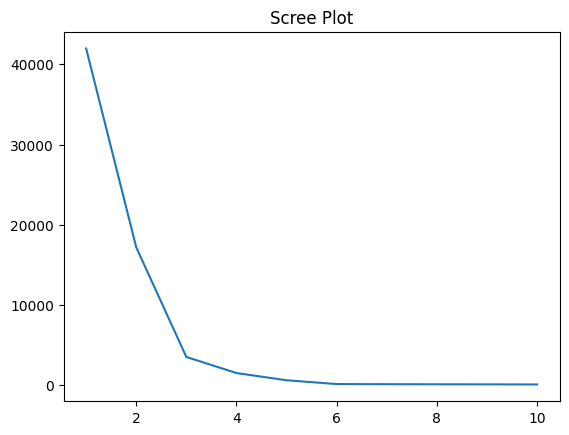

In [65]:
# Create a scree plot:
k_bar = 10
k_grid = np.arange(1,k_bar+1)
SSE = np.zeros(k_bar)
for k in range(k_bar):
    model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=100)
    model = model.fit(X)
    SSE[k] = model.inertia_

scree_plot = sns.lineplot(x=k_grid, y=SSE).set_title('Scree Plot')

Price                                                            
           count        mean         std   min    25%    50%    75%      max
cluster                                                                     
0         8558.0  135.166745   96.704612  20.0   80.0  119.0  170.0   5000.0
1        11180.0  151.145528  151.865490  10.0   85.0  128.0  190.0  10000.0
2         2417.0  241.107158  233.268660  27.0  114.0  180.0  299.0   4500.0

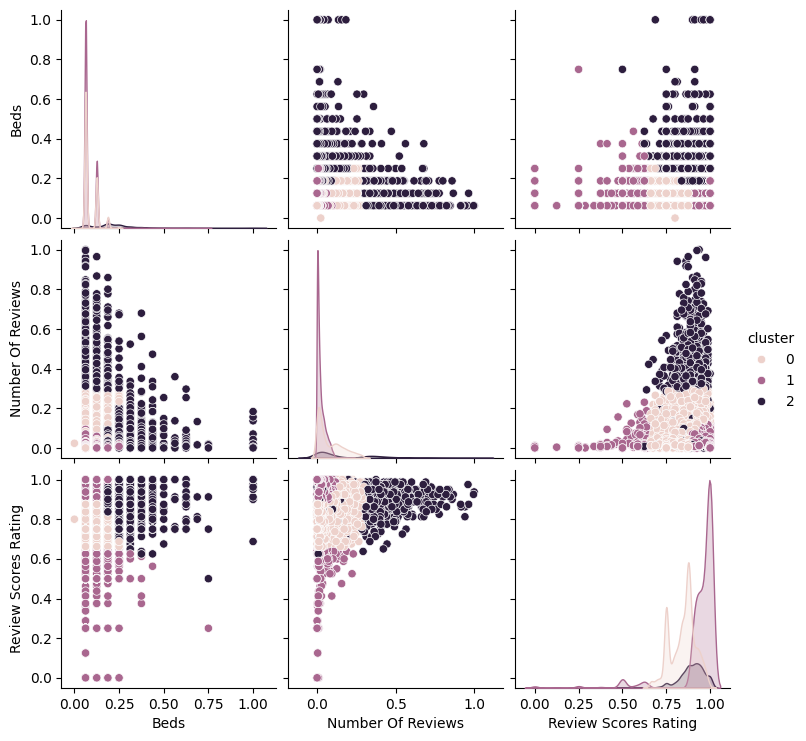

In [68]:
# Based on the elbows in the graph, the number of clusters should be 3.

# change number of clusters to 3
X.drop('cluster', axis=1)
model = KMeans(n_clusters=3, max_iter=300, n_init=10, random_state=100)
model = model.fit(X)
X['cluster'] = model.labels_

sns.pairplot(data=X, hue='cluster')
cleaned['cluster'] = X['cluster']
cleaned.loc[:, ['Price', 'cluster']].groupby('cluster').describe()


**Q2.** This is a question about $k$ means clustering. We want to investigate how adjusting the "noisiness" of the data impacts the quality of the algorithm and the difficulty of picking $k$.

1. Run the code below, which creates four datasets: `df0_125`, `df0_25`, `df0_5`, `df1_0`, and `df2_0`. Each data set is created by increasing the amount of `noise` (standard deviation) around the cluster centers, from `0.125` to `0.25` to `0.5` to `1.0` to `2.0`.

```
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)
```

2. Make scatterplots of the $(X1,X2)$ points by group for each of the datasets. As the `noise` goes up from 0.125 to 2.0, what happens to the visual distinctness of the clusters?
3. Create a scree plot for each of the datasets. Describe how the level of `noise` affects the scree plot (particularly the presence of a clear "elbow") and your ability to definitively select a $k$.
4. Explain the intuition of the elbow, using this numerical simulation as an example.

**Q3.** We looked at computer vision with $k$NN in a previous question. Can $k$ means clustering correctly group digits, even if we don't know which symbols are which?

1. To load the data, run the following code in a chunk:
```
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test
```
The `y_test` and `y_train` vectors, for each index `i`, tell you want number is written in the corresponding index in `X_train[i]` and `X_test[i]`. The value of `X_train[i]` and `X_test[i]`, however, is a 28$\times$28 array whose entries contain values between 0 and 256. Each element of the matrix is essentially a "pixel" and the matrix encodes a representation of a number. To visualize this, run the following code to see the first ten numbers:
```
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5):
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()
```
OK, those are the data: Labels attached to handwritten digits encoded as a matrix.

2. What is the shape of `X_train` and `X_test`? What is the shape of `X_train[i]` and `X_test[i]` for each index `i`? What is the shape of `y_train` and `y_test`?
3. Use Numpy's `.reshape()` method to covert the training and testing data from a matrix into an vector of features. So, `X_test[index].reshape((1,784))` will convert the $index$-th element of `X_test` into a $28\times 28=784$-length row vector of values, rather than a matrix. Turn `X_train` into an $N \times 784$ matrix $X$ that is suitable for scikit-learn's kNN classifier where $N$ is the number of observations and $784=28*28$ (you could use, for example, a `for` loop).
4. Use $k$ means clustering on the reshaped `X_test` data with `k=10`.  
5. Cross tabulate the cluster assignments with the true labels for the test set values. How good is the correspondence? What proportion of digits are clustered correctly? Which digits are the hardest to distinguish from one another? Can $k$MC recover the latent digits 0 to 9, without even knowing what those digits were?
6. If you use a scree plot to determine the number of clusters $k$, does it pick 10 (the true number of digits), or not? If it fails to pick $k=10$, which digits does it tend to combine into the same classification?